# Building models 

Now that we've created some embeddings, we can use them to build models. We'll start with a k-means clustering model. We'll use the embeddings to cluster the data into 10 clusters. We'll then use the cluster assignments to create a new feature for each data point. We'll then use this new feature to train a logistic regression model to predict the target variable.

Time allowing we will build a Latent Dirichlet Allocation (LDA) model. LDA is a topic modeling technique that is often used to discover topics in text data. 

## Clustering

Clustering is an unsupervised learning technique that groups data points into clusters based on their similarity. The similarity is measured using a distance metric. The most common distance metric is Euclidean distance. The goal of clustering is to group data points that are similar to each other into the same cluster.

### Uses of clustering

Clustering leaves room for interpretation. There is no right or wrong answer. This makes clustering useful for exploratory data analysis. Clustering can help us understand the structure of the data. It can help us identify outliers. It can help us identify groups of similar data points. It can help us identify groups of dissimilar data points. It can help us identify groups of data points that are similar to each other but dissimilar to data points in other groups.

As far as text analysis goes, clustering can help us identify groups of similar documents. Then we as human curators can label the clusters. This can help us understand the structure of the corpus. It can help us identify outliers. It can help us identify groups of similar documents. It can help us identify groups of dissimilar documents. It can help us identify groups of documents that are similar to each other but dissimilar to documents in other groups.

### k-means clustering

The most common clustering algorithm is k-means clustering. The algorithm works as follows:

1. Randomly initialize k cluster centroids
2. Assign each data point to the cluster whose centroid is closest to it
3. Recompute the cluster centroids
4. Repeat steps 2 and 3 until the cluster assignments stop changing

There are some edge cases that can cause the algorithm to fail to converge. For example, if a cluster ends up with no data points assigned to it, then the centroid of that cluster will be undefined. In this case, the algorithm will fail to converge. To avoid this, we can use a modified version of the algorithm that allows for empty clusters. This modified version of the algorithm is called k-means++.

More about k-means: https://en.wikipedia.org/wiki/K-means_clustering

### k-means in practice

We do not have to implement the k-means algorithm ourselves. We can use the implementation provided by scikit-learn. The scikit-learn implementation of k-means uses the k-means++ initialization method by default.

### Various Clustering Algorithms on Scikit-Learn

![Clustering Algorithms](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png)

In [1]:
# Building models from our embeddings

# As before we will be using Path for our file work

# python version
import sys
print("Python", sys.version)

from pathlib import Path

# we will be using pandas for our dataframes
import pandas as pd
# version
print("Pandas", pd.__version__)

# we will want to use scikit-learn clustering algorithms for our models
# import sklearn # sklearn is a bit library so better idea would be to import specific modules
from sklearn.cluster import KMeans # KMeans is a clustering algorithm
# sklearn version
from sklearn import __version__ as sklearn_version # we can import just a single variable and rename it
print("Scikit-learn", sklearn_version)

# we will also want to use gensim for LDAModel
import gensim # gensim is also pretty big so we could have imported specific modules
# gensim version
print("Gensim", gensim.__version__)


Python 3.11.4 (tags/v3.11.4:d2340ef, Jun  7 2023, 05:45:37) [MSC v.1934 64 bit (AMD64)]
Pandas 2.0.3
Scikit-learn 1.3.0
Gensim 4.3.1


In [2]:
# url for our data in a pickle format on our repository
url = "https://github.com/ValRCS/BSSDH_2023_workshop/raw/main/data/old_bailey_sample_1720_1913_cleaned_embeddings.pkl"
print("Will import data from", url)

Will import data from https://github.com/ValRCS/BSSDH_2023_workshop/raw/main/data/old_bailey_sample_1720_1913_cleaned_embeddings.pkl


In [3]:
# lets import our data into a dataframe
df = pd.read_pickle(url, compression='zip') # we need to specify compression as zip else we will get an error for load unpickling
# shape of our dataframe
print("Dataframe shape", df.shape)
# lets see first 5 rows
df.head()
# whew we are back in business!

Dataframe shape (1637, 13)


,year,trial_number,punishment,text,dirty_len,clean_len,words,word_count,word_count_cleaned,words_lemmatized,word_count_cleaned_no_digits,top_5_words_tfidf,doc2vec
0,1720,1,Transportation,of st leonard eastcheap was indicted for felon...,705,684,"[st, leonard, eastcheap, indicted, feloniously...",129,66,"[st, leonard, eastcheap, indict, feloniously, ...",60,"[(confest, 0.1972391174872452), (depose, 0.215...","[0.5782519, -0.7623888, 0.6419972, -0.01352496..."
1,1720,2,Transportation,alice jones of st michaels cornhill was indict...,1087,1053,"[alice, jones, st, michaels, cornhill, indicte...",200,87,"[alice, jones, st, michaels, cornhill, indict,...",82,"[(shop, 0.18964859164396325), (bermundas, 0.19...","[0.539647, 0.2990364, 0.90089196, 0.06318843, ..."
2,1720,3,Transportation,james wilson of st katharine coleman was indic...,904,883,"[james, wilson, st, katharine, coleman, indict...",177,79,"[james, wilson, st, katharine, coleman, indict...",71,"[(hung, 0.21832648950390215), (deposed, 0.2419...","[0.46213368, -0.7192513, 1.1036029, 0.02122612..."
3,1720,4,Transportation,james mercy alias masse of st andrew undershaf...,804,778,"[james, mercy, alias, masse, st, andrew, under...",143,67,"[james, mercy, alias, masse, st, andrew, under...",64,"[(undershaft, 0.2126517359898944), (lockt, 0.2...","[-0.18796237, -0.011926579, 0.8681372, -0.6687..."
4,1720,5,Transportation,benjamin cook alias richard smith of st mary a...,483,466,"[benjamin, cook, alias, richard, smith, st, ma...",88,46,"[benjamin, cook, alias, richard, smith, st, ma...",43,"[(stopt, 0.23416420335477436), (abchurch, 0.26...","[0.13697092, 0.5740971, 0.84388906, -0.2005741..."


In [4]:
# let's print how many values are in doc2vec column for single row
print("Number of values in doc2vec column for first row", len(df.doc2vec[0]))

Number of values in doc2vec column for first row 50


In [5]:
# what is range of values in doc2vec column for first row
print("Range of values in doc2vec column for first row", min(df.doc2vec[0]), max(df.doc2vec[0]))

Range of values in doc2vec column for first row -1.173319 1.5427929


In [6]:
# what is range of values across all rows for values inside doc2vec column?

print("Range of values across all rows for doc2vec column", df.doc2vec.apply(lambda x: len(x)).min(), df.doc2vec.apply(lambda x: len(x)).max())
# not quite what we want but it is good to know we have 50 values in each column of doc2vec for each row

Range of values across all rows for doc2vec column 50 50


In [7]:
# what we want is figure out min and max values for values inside list of doc2vec column

# easiest would be to create a big list of all values in doc2vec column and then find min and max values
# we can use list comprehension for that
# we will use numpy for min and max functions

import numpy as np
# version
print("Numpy", np.__version__)

# one way to flatten our list of lists:
all_doc2vec_values = [value for row in df.doc2vec for value in row] # this trick is due to https://stackoverflow.com/questions/952914/how-to-make-a-flat-list-out-of-list-of-lists
# provided by Python guru Alex Martelli - author of some nice Python books
# it looks the wrong way around but it works
# there are other ways to flatten a list of lists but this is one of the fastest

# how many values we have in our list
print("Number of values in our list", len(all_doc2vec_values))


# let's convert list to pandas series and get some statistics
all_doc2vec_values_series = pd.Series(all_doc2vec_values)
# let's get some statistics
all_doc2vec_values_series.describe()
# so it looks like a nice centered distribution with standard deviation or araound 1.28


Numpy 1.24.4
Number of values in our list 81850


count    81850.000000
mean        -0.041636
std          1.287664
min        -14.923249
25%         -0.525724
50%         -0.036388
75%          0.450801
max         17.326731
dtype: float64

Seaborn 0.12.2


<Axes: ylabel='Count'>

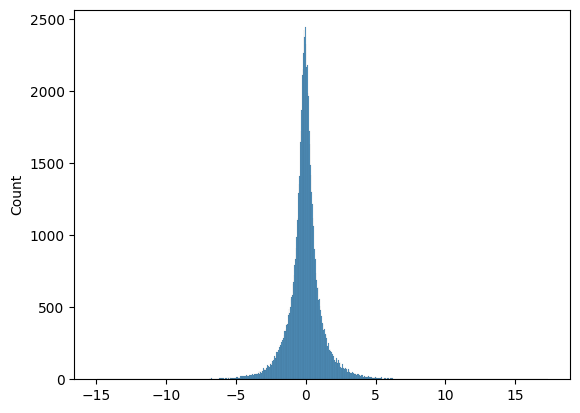

In [8]:
# let's plot the distribution of our values
import matplotlib.pyplot as plt
# we will use seaborn for plotting
import seaborn as sns
# seaborn version
print("Seaborn", sns.__version__)
# let's plot a histogram of our values
sns.histplot(all_doc2vec_values_series)


### Normal distribution

Now that certainly looks like a normal distribution - also known as Gaussian distribution.

Link on wikipedia: https://en.wikipedia.org/wiki/Normal_distribution

![Normal](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/525px-Standard_deviation_diagram.svg.png)

We would have to read the paper behind word2vec and doc2vec to see how this type of distribution was achieved.

Now for each document the values will not be as smooth which is good because we want to see the differences between documents.

## Building k-means clustering model

In [9]:
# but enough playing around, let's build our kmeans model

# we will use KMeans from sklearn
# we will start with 5 clusters
# we will use random_state=42 for reproducibility

kmeans_model = KMeans(n_clusters=5, random_state=42)
# our features will be doc2vec column

# we can pass in numpy array or pandas dataframe
# we will pass in numpy array

# let's print dimensions of our numpy array
X = df.doc2vec.to_numpy() # it is very common to use X for features
# why X it indicates a matrix of features, so generally a 2D array
print("Dimensions of our numpy array", X.shape)

 # kmeans model expects numpy array of dimensions (n_samples, n_features)

Dimensions of our numpy array (1637,)


In [10]:
# we got one dimension right, but we need to reshape our array to have 50 features
# let's check out first row
print("First row of our numpy array", X[0])
# that certainly looks like 50 features 

First row of our numpy array [ 0.5782519  -0.7623888   0.6419972  -0.01352497 -0.02889981  0.33993718
  0.5432642  -0.79231936 -0.17276347  0.2894747  -0.1814085  -1.173319
 -0.6315174  -0.39531848 -0.8824809   0.44549268 -0.00762038 -0.2669511
  0.2836903   0.31825238 -0.46722114 -0.12032476  1.5427929  -0.16820197
 -0.5314884  -1.1173726  -0.06433648 -1.0612508   0.8740516   0.24408202
  0.44927603 -0.25962996 -0.23105077  0.64783835  0.34015447  0.6314114
  0.5084683  -0.12150066 -0.8327542  -0.24457273  0.46525353 -0.43322456
  0.48058265 -0.8931239  -0.274334   -0.0263922   0.47523484 -0.10395955
  0.0836495   0.5372703 ]


In [11]:
# what type is it though>?
print("Type of our numpy array", type(X))
print("Type of our numpy array", type(X[0]))
# how about first value
print("Type of our first value", type(X[0][0]))
# print first value of first value
print("First value of first value", X[0][0])
# print last value of first value
print("Last value of first value", X[0][-1])
# so we can certainly access values in our numpy array as if it was a list of lists
# for some reason shape is not showing 50 features

Type of our numpy array <class 'numpy.ndarray'>
Type of our numpy array <class 'numpy.ndarray'>
Type of our first value <class 'numpy.float32'>
First value of first value 0.5782519
Last value of first value 0.5372703


In [12]:
# for the time being we will convert it to list of lists which is much less efficient but easier to work with
X_list = df.doc2vec.apply(lambda x: list(x)).to_list()
# let's check out first row
print("First row of our list of lists", X_list[0])

First row of our list of lists [0.5782519, -0.7623888, 0.6419972, -0.013524966, -0.028899806, 0.33993718, 0.5432642, -0.79231936, -0.17276347, 0.2894747, -0.1814085, -1.173319, -0.6315174, -0.39531848, -0.8824809, 0.44549268, -0.007620384, -0.2669511, 0.2836903, 0.31825238, -0.46722114, -0.12032476, 1.5427929, -0.16820197, -0.5314884, -1.1173726, -0.06433648, -1.0612508, 0.8740516, 0.24408202, 0.44927603, -0.25962996, -0.23105077, 0.64783835, 0.34015447, 0.6314114, 0.5084683, -0.12150066, -0.8327542, -0.24457273, 0.46525353, -0.43322456, 0.48058265, -0.8931239, -0.274334, -0.026392203, 0.47523484, -0.103959545, 0.0836495, 0.5372703]


In [13]:
# in Machine Learning it is very common for training data to be in a form of list of lists
# also it is common to call the process of building a model training
# in sklearn as well as in gensim we will be using fit method to train our model
# fit method expects a list of lists
# let's train our model

kmeans_model.fit(X_list)
# we got a warning that in the future n_init will be changed to 10

c:\Users\Valdis\Github\BSSDH_2023_workshop\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=42)

In [14]:
# let's convert our X_list back to numpy array
X = np.array(X_list)
# let's check out shape
print("Dimensions of our numpy array", X.shape)
# now that looks better
# print first row
print("First row of our numpy array", X[0])

Dimensions of our numpy array (1637, 50)
First row of our numpy array [ 0.5782519  -0.7623888   0.6419972  -0.01352497 -0.02889981  0.33993718
  0.5432642  -0.79231936 -0.17276347  0.2894747  -0.1814085  -1.173319
 -0.6315174  -0.39531848 -0.8824809   0.44549268 -0.00762038 -0.2669511
  0.2836903   0.31825238 -0.46722114 -0.12032476  1.5427929  -0.16820197
 -0.5314884  -1.1173726  -0.06433648 -1.0612508   0.8740516   0.24408202
  0.44927603 -0.25962996 -0.23105077  0.64783835  0.34015447  0.6314114
  0.5084683  -0.12150066 -0.8327542  -0.24457273  0.46525353 -0.43322456
  0.48058265 -0.8931239  -0.274334   -0.0263922   0.47523484 -0.10395955
  0.0836495   0.5372703 ]


### Dealing with errors

One takeaway is that even if you encounter some error with external libraries you can often fall back to tried and true data structures
such as lists and dictionaries. In our case it was list of lists that saved the day.

### K-means clustering results


In [15]:
# now that we have run the fit method we can use our model to predict clusters for our data
# we will use predict method
# predict method expects a numpy array

# let's predict clusters for our data
y_pred = kmeans_model.predict(X_list)
# y_pred = kmeans_model.predict(X) # this does not work of data type mismatch between double and float
# note in many supervised machine learning algorithms it is required to have a test set and training set so not to overfit our model
# with unsupervised kmeans we can use predict method to predict clusters for our data itself with no ill effects because we are not using labels

# shape of y_pred
print("Shape of y_pred", y_pred.shape)



Shape of y_pred (1637,)


In [16]:
# let's assign our predicted clusters to our dataframe
df['cluster'] = y_pred
# let's check out first 5 rows
df.head()

,year,trial_number,punishment,text,dirty_len,clean_len,words,word_count,word_count_cleaned,words_lemmatized,word_count_cleaned_no_digits,top_5_words_tfidf,doc2vec,cluster
0,1720,1,Transportation,of st leonard eastcheap was indicted for felon...,705,684,"[st, leonard, eastcheap, indicted, feloniously...",129,66,"[st, leonard, eastcheap, indict, feloniously, ...",60,"[(confest, 0.1972391174872452), (depose, 0.215...","[0.5782519, -0.7623888, 0.6419972, -0.01352496...",1
1,1720,2,Transportation,alice jones of st michaels cornhill was indict...,1087,1053,"[alice, jones, st, michaels, cornhill, indicte...",200,87,"[alice, jones, st, michaels, cornhill, indict,...",82,"[(shop, 0.18964859164396325), (bermundas, 0.19...","[0.539647, 0.2990364, 0.90089196, 0.06318843, ...",1
2,1720,3,Transportation,james wilson of st katharine coleman was indic...,904,883,"[james, wilson, st, katharine, coleman, indict...",177,79,"[james, wilson, st, katharine, coleman, indict...",71,"[(hung, 0.21832648950390215), (deposed, 0.2419...","[0.46213368, -0.7192513, 1.1036029, 0.02122612...",1
3,1720,4,Transportation,james mercy alias masse of st andrew undershaf...,804,778,"[james, mercy, alias, masse, st, andrew, under...",143,67,"[james, mercy, alias, masse, st, andrew, under...",64,"[(undershaft, 0.2126517359898944), (lockt, 0.2...","[-0.18796237, -0.011926579, 0.8681372, -0.6687...",1
4,1720,5,Transportation,benjamin cook alias richard smith of st mary a...,483,466,"[benjamin, cook, alias, richard, smith, st, ma...",88,46,"[benjamin, cook, alias, richard, smith, st, ma...",43,"[(stopt, 0.23416420335477436), (abchurch, 0.26...","[0.13697092, 0.5740971, 0.84388906, -0.2005741...",1


In [17]:
# value counts for our clusters
df.cluster.value_counts()

cluster
1    995
2    234
0    230
3    102
4     76
Name: count, dtype: int64

In [18]:
# now it would be interesting to plot our clusters over the years

# let's plot our clusters over the years
# we ill use 100% stacked bar chart to show relative proportions of clusters over the years

# we will use pandas groupby method to group our data by year and cluster
# we will use size method to get number of rows in each group
# we will use unstack method to convert our data into a dataframe

df_year_cluster = df.groupby(['year', 'cluster']).size().unstack()
# let's check out first 5 rows
df_year_cluster.head()

cluster,0,1,2,3,4
year,,,,,
1720,2.0,69.0,2.0,NaN,2.0
1731,1.0,70.0,5.0,NaN,2.0
1742,8.0,71.0,3.0,2.0,3.0
1754,19.0,33.0,8.0,NaN,2.0
1762,14.0,12.0,NaN,NaN,1.0


In [19]:
# now we need to fill in missing values with 0
df_year_cluster.fillna(0, inplace=True) # note inplace=True means we will change our dataframe in place
# let's check out first 5 rows
df_year_cluster.head()

cluster,0,1,2,3,4
year,,,,,
1720,2.0,69.0,2.0,0.0,2.0
1731,1.0,70.0,5.0,0.0,2.0
1742,8.0,71.0,3.0,2.0,3.0
1754,19.0,33.0,8.0,0.0,2.0
1762,14.0,12.0,0.0,0.0,1.0


In [20]:
# now let's create a column of total values for each year
df_year_cluster['total'] = df_year_cluster.sum(axis=1)
# let's check out first 5 rows
df_year_cluster.head()

cluster,0,1,2,3,4,total
year,,,,,,
1720,2.0,69.0,2.0,0.0,2.0,75.0
1731,1.0,70.0,5.0,0.0,2.0,78.0
1742,8.0,71.0,3.0,2.0,3.0,87.0
1754,19.0,33.0,8.0,0.0,2.0,62.0
1762,14.0,12.0,0.0,0.0,1.0,27.0


In [21]:
# now let's create a proportion column for each cluster
# we will divide each cluster column by total column and create a new column with results
for cluster in range(5):
    df_year_cluster[f"c_{cluster}_perc"] = df_year_cluster[cluster] / df_year_cluster['total']
# let's check out first 5 rows
df_year_cluster.head()

cluster,0,1,2,3,4,total,c_0_perc,c_1_perc,c_2_perc,c_3_perc,c_4_perc
year,,,,,,,,,,,
1720,2.0,69.0,2.0,0.0,2.0,75.0,0.026667,0.920000,0.026667,0.000000,0.026667
1731,1.0,70.0,5.0,0.0,2.0,78.0,0.012821,0.897436,0.064103,0.000000,0.025641
1742,8.0,71.0,3.0,2.0,3.0,87.0,0.091954,0.816092,0.034483,0.022989,0.034483
1754,19.0,33.0,8.0,0.0,2.0,62.0,0.306452,0.532258,0.129032,0.000000,0.032258
1762,14.0,12.0,0.0,0.0,1.0,27.0,0.518519,0.444444,0.000000,0.000000,0.037037


In [22]:
# now we can plot our last 5 columns as 100% stacked bar chart
# using x as year and y as proportion of each cluster

# let's use plotly express for our plot

import plotly.express as px

# let's create a list of our columns to plot

columns_to_plot = [f"c_{cluster}_perc" for cluster in range(5)]
# let's check out our list

# so x axis will be year and y axis will be proportion of each cluster

# let's plot our data

fig = px.bar(df_year_cluster, 
             x=df_year_cluster.index, 
             y=columns_to_plot, 
             title="Proportion of clusters over the years", 
             labels={'x':'Year', 'y':'Proportion of clusters'})

# let's show our plot
fig.show()

### Conclusions from 5 clusters

We can certainly see some interesting trends over the years.

What is really interesting is that year 1784 is all one cluster. This would require further investigation. It is quite surprising that the year 1784 is so different from the rest of the years.

Some possible explanations:

* It is possible that there is some corruption in the data.
* It is possible that the year 1784 is a year of some major event that is not captured in the data.
* It is possible that doc2vec that generated the embeddings is not working properly.
* it is quite possible that 1784 has some unique characteristics that are not present in other years. Maybe a special header is present in the documents from 1784 that is not present in other years.



We have to remember that kmeans is an unsupervised algorithm and it is up to us to interpret the results.

Also it is "how high to jump" question. We can try 10 clusters and see what happens. We can also try 3 clusters and see what happens.

## How to determine the number of clusters

This is the million dollar question. There are many ways to determine the number of clusters. One way is to use the elbow method. The elbow method is a heuristic that looks at the percentage of variance explained as a function of the number of clusters. The idea is that as we increase the number of clusters, the percentage of variance explained will increase. At some point, adding more clusters will not add much explanatory power. This point is called the elbow. The elbow method looks for the point where the percentage of variance explained stops increasing quickly.

In [24]:
# now let's see if we can find the elbow of our kmeans model
# we will calculate km.inertia_ for each number of clusters from 1 to 20
# we will plot the results

# let's create a list of inertia values
inertia_values = []
# let's create a list of number of clusters
n_clusters = list(range(1, 21)) # 1 is kind of silly of course but we will do it for completeness

from tqdm import tqdm # tqdm is a nice progress bar library

# let's loop through our number of clusters
# kmeans is fast enough and our dataset small enough so we can do it in a loop
for n_cluster in tqdm(n_clusters):
    # let's create a kmeans model
    kmeans_model = KMeans(n_clusters=n_cluster, random_state=42, n_init=10)
    # let's train our model
    kmeans_model.fit(X_list)
    # let's get inertia value
    inertia_values.append(kmeans_model.inertia_)

# let's check out our inertia values
inertia_values


100%|██████████| 20/20 [00:02<00:00,  7.87it/s]


[116454.24168168937,
 109547.91759786426,
 104767.04338962866,
 101978.89930226817,
 99699.21626579798,
 97622.49416295285,
 96519.19296511402,
 94214.89038892223,
 93088.05295048568,
 92143.85968502215,
 90281.7602267529,
 89502.79298458583,
 88626.78820392436,
 88243.05197473436,
 86478.22856132853,
 86294.93443609166,
 84768.51047949109,
 84649.90035167981,
 83762.45609139431,
 82851.86178853943]

In [25]:
# it is hard to tell from these values where the elbow is
# so let's plot it

# let's plot our inertia values
fig = px.line(x=n_clusters, y=inertia_values, title="Inertia values for different number of clusters")
# let's show our plot
fig.show()

<Axes: >

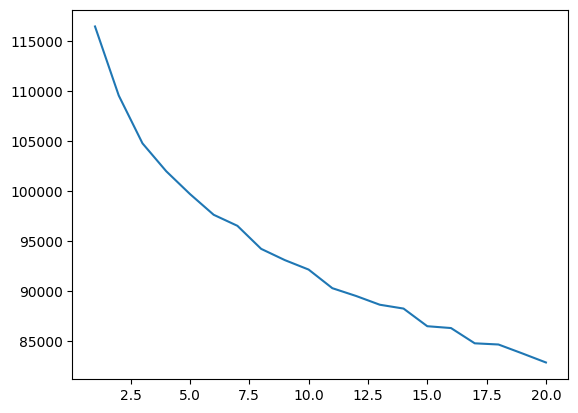

In [26]:
# alternatively simpler graph using sns
sns.lineplot(x=n_clusters, y=inertia_values)

### Limitations of the elbow method

It certainly looks like we do not have a clear cut elbow - break point.
We can choose any number of cluster of our liking. We can also choose 10 clusters as we did before.

Elbow method is just a tool. It might not provide enough additional information to justify the additional complexity of the model. It is up to us to decide if the additional complexity is worth it.

In [ ]:
# We could play around with different clustering methods and different number of clusters

# the general process is the same
# initialize model from skleanr.cluster selection
# docs: https://scikit-learn.org/stable/modules/clustering.html

# train model using fit method

# predict clusters using predict method

# what would change is some of the parameters we pass in to our model
# we can generally use default parameters for most models

# the parameters that are used for fine-tuning are called hyperparameters. So we can say we are fine-tuning our model by changing hyperparameters.
# Sounds fancy but it is just a matter of trying out different values for different parameters and seeing what works best for our data

## Topic Modeling using Latent Dirichlet Allocation (LDA)

If kmeans gives us strict clustering then LDA gives us soft clustering. In other words each document can belong to multiple topics.

### LDA

LDA is a generative probabilistic model. It assumes that each document is a mixture of topics and that each word in the document is attributable to the document's topics.

### LDA in practice

We do not have to implement LDA ourselves. We can use the implementation provided by gensim.

Some more information on LDA: https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation

In [50]:
### LDA MODEL
## Doc for gensim LDA model: https://radimrehurek.com/gensim/models/ldamodel.html

# gensim needs list of lists of tokens - here words

# we already have our lemma column with list of lemmas
# we can use that
texts = df.words_lemmatized.to_list()
# print first 3 rows
print(*texts[:3], sep = "\n")
# here we can see that we could have cleaned our data we have some really short lists
# also getting rid of say digits actually robbed us of some information

['st', 'leonard', 'eastcheap', 'indict', 'feloniously', 'steal', 'pound', 'weight', 'tobacco', 'value', 'l', 's', 'good', 'job', 'wick', 'dwelling', 'house', 'say', 'job', 'wick', 'april', 'appear', 'prisoner', 'prosecutor', 'servant', 'fellow', 'servant', 'depose', 'perceive', 'pocket', 'stick', 'search', 'find', 'paper', 'tobacco', 'worth', 'd', 'own', 'master', 'take', 'cellar', 'constable', 'depose', 'confest', 'take', 'tobacco', 'time', 'say', 'paper', 'tobacco', 'produce', 'court', 'jury', 'consider', 'matter', 'find', 'guilty', 'value', 'd', 'transportation']
['alice', 'jones', 'st', 'michaels', 'cornhill', 'indict', 'privately', 'steal', 'bermundas', 'hat', 'value', 's', 'shop', 'edward', 'hillior', 'april', 'prosecutors', 'servant', 'deposed', 'prisner', 'come', 'master', 'shop', 'askd', 'hat', 's', 'price', 'shew', 'agreed', 'say', 'country', 'stop', 'bishopsgatestreet', 'coach', 'go', 'come', 'fetch', 'go', 'shop', 'perceive', 'hardly', 'walk', 'fetcht', 'hat', 'mention', 'i

In [51]:
# now we need to create a dictionary of our words
# we will use gensim corpora Dictionary class
# docs: https://radimrehurek.com/gensim/corpora/dictionary.html

from gensim.corpora import Dictionary

# let's create our dictionary
dictionary = Dictionary(texts)
# let's check out our dictionary
# print how many words we have in our dictionary
print("Number of words in our dictionary", len(dictionary)) 
# that certainly seems familiar from our previous work that's good news



Number of words in our dictionary 18118


In [54]:
# print first 10 words in our dictionary
print("First 10 words in our dictionary", list(dictionary.items())[:10])
# last 10 words in our dictionary
print("Last 10 words in our dictionary", list(dictionary.items())[-10:])
# how about m iddle 10 words in our dictionary
print("Middle 10 words in our dictionary", list(dictionary.items())[len(dictionary)//2-5:len(dictionary)//2+5])

First 10 words in our dictionary [(0, 'appear'), (1, 'april'), (2, 'cellar'), (3, 'confest'), (4, 'consider'), (5, 'constable'), (6, 'court'), (7, 'd'), (8, 'depose'), (9, 'dwelling')]
Last 10 words in our dictionary [(18108, 'mb'), (18109, 'morally'), (18110, 'noncombatant'), (18111, 'olive'), (18112, 'prain'), (18113, 'radius'), (18114, 'towingpath'), (18115, 'unclimbable'), (18116, 'wharry'), (18117, 'yeddon')]
Middle 10 words in our dictionary [(9054, 'judging'), (9055, 'juries'), (9056, 'kin'), (9057, 'kingstonuponhull'), (9058, 'lawyer'), (9059, 'learned'), (9060, 'lease'), (9061, 'ledgerclerk'), (9062, 'legally'), (9063, 'levitt')]


In [57]:
# strange that there are no words seemingly starting with b
# is that the case?
# let's check out words starting with b
print("Words starting with b", [(key, word)  for key, word in dictionary.items() if word.startswith('b')])
# so there are words starting with b

Words starting with b [(50, 'bermundas'), (51, 'bishopsgatestreet'), (97, 'bar'), (98, 'beef'), (131, 'believe'), (160, 'benjamin'), (177, 'bengodwin'), (187, 'bring'), (200, 'botolph'), (241, 'brandy'), (242, 'break'), (243, 'breeche'), (268, 'book'), (301, 'bride'), (305, 'bishopsgate'), (306, 'breaking'), (319, 'burglary'), (343, 'bridge'), (354, 'blackwellhall'), (355, 'blue'), (356, 'broadcloth'), (357, 'bundle'), (358, 'buy'), (412, 'barter'), (413, 'bent'), (430, 'baker'), (431, 'broad'), (449, 'brandyshop'), (460, 'black'), (461, 'boney'), (462, 'boy'), (504, 'bid'), (505, 'bigness'), (548, 'beat'), (549, 'believd'), (550, 'bell'), (551, 'bloody'), (552, 'bull'), (641, 'box'), (642, 'brass'), (643, 'brother'), (684, 'busy'), (698, 'bed'), (716, 'brown'), (736, 'beesley'), (737, 'blackd'), (738, 'body'), (775, 'beer'), (790, 'bigg'), (791, 'biggs'), (792, 'bolearmoniac'), (793, 'boyle'), (794, 'breakfast'), (882, 'blanket'), (921, 'breech'), (924, 'bay'), (953, 'barbara'), (954,

In [58]:
# now we need to create a corpus for gensim 

corpus = [dictionary.doc2bow(text) for text in texts]
# let's check out first 2 rows
print(*corpus[:2], sep = "\n")

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 1), (35, 2), (36, 1), (37, 1), (38, 1), (39, 2), (40, 1), (41, 4), (42, 1), (43, 2), (44, 1), (45, 2), (46, 1)]
[(1, 1), (4, 1), (7, 1), (8, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (19, 1), (20, 1), (22, 1), (23, 1), (26, 1), (29, 1), (32, 2), (33, 2), (35, 1), (36, 1), (37, 1), (42, 1), (43, 2), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 2), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 2), (69, 1), (70, 4), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90,

In [59]:
# what could word no 1 be?
# so each document was converted into a list of tuples, first value is word id and second value is number of times that word appears in the document

# now we can create our LDA model

# we need to import LdaModel from gensim.models
from gensim.models import LdaModel
# Train the model on the corpus.
lda = LdaModel(corpus, 
               num_topics=10,
               id2word=dictionary) # again this is our default number of topics, you can play around with it and choose a different number

In [60]:
# let's show our topics
lda.show_topics()

[(0,
  '0.026*"prisoner" + 0.015*"do" + 0.012*"say" + 0.011*"mr" + 0.010*"go" + 0.009*"see" + 0.008*"value" + 0.007*"q" + 0.007*"come" + 0.007*"find"'),
 (1,
  '0.031*"say" + 0.017*"prisoner" + 0.016*"do" + 0.013*"go" + 0.012*"know" + 0.012*"q" + 0.010*"mr" + 0.010*"take" + 0.010*"see" + 0.008*"come"'),
 (2,
  '0.019*"say" + 0.019*"prisoner" + 0.015*"do" + 0.013*"mr" + 0.013*"go" + 0.013*"see" + 0.010*"come" + 0.009*"know" + 0.009*"q" + 0.008*"time"'),
 (3,
  '0.020*"say" + 0.016*"prisoner" + 0.016*"go" + 0.013*"do" + 0.013*"mr" + 0.012*"q" + 0.010*"take" + 0.010*"come" + 0.010*"know" + 0.009*"give"'),
 (4,
  '0.023*"prisoner" + 0.015*"go" + 0.015*"say" + 0.013*"come" + 0.012*"do" + 0.012*"mr" + 0.011*"see" + 0.011*"take" + 0.010*"man" + 0.010*"know"'),
 (5,
  '0.020*"say" + 0.015*"mr" + 0.015*"do" + 0.014*"take" + 0.013*"prisoner" + 0.013*"come" + 0.013*"go" + 0.009*"know" + 0.009*"q" + 0.008*"value"'),
 (6,
  '0.027*"say" + 0.016*"do" + 0.014*"prisoner" + 0.011*"mr" + 0.011*"go" + 0.

In [61]:
# now let's save our model just in case
# let's create models folder in our current directory if it does not exist
# Path("models").mkdir(parents=True, exist_ok=True)
# we will use save method
from gensim.test.utils import datapath
# we will use datapath to create a path to our model
temp_file = datapath("lda_model_10.model")
lda.save(temp_file)

In [62]:
# let's load our model
loaded_model = LdaModel.load(temp_file)

In [63]:
# use loaded model to print topics
loaded_model.print_topics()

[(0,
  '0.026*"prisoner" + 0.015*"do" + 0.012*"say" + 0.011*"mr" + 0.010*"go" + 0.009*"see" + 0.008*"value" + 0.007*"q" + 0.007*"come" + 0.007*"find"'),
 (1,
  '0.031*"say" + 0.017*"prisoner" + 0.016*"do" + 0.013*"go" + 0.012*"know" + 0.012*"q" + 0.010*"mr" + 0.010*"take" + 0.010*"see" + 0.008*"come"'),
 (2,
  '0.019*"say" + 0.019*"prisoner" + 0.015*"do" + 0.013*"mr" + 0.013*"go" + 0.013*"see" + 0.010*"come" + 0.009*"know" + 0.009*"q" + 0.008*"time"'),
 (3,
  '0.020*"say" + 0.016*"prisoner" + 0.016*"go" + 0.013*"do" + 0.013*"mr" + 0.012*"q" + 0.010*"take" + 0.010*"come" + 0.010*"know" + 0.009*"give"'),
 (4,
  '0.023*"prisoner" + 0.015*"go" + 0.015*"say" + 0.013*"come" + 0.012*"do" + 0.012*"mr" + 0.011*"see" + 0.011*"take" + 0.010*"man" + 0.010*"know"'),
 (5,
  '0.020*"say" + 0.015*"mr" + 0.015*"do" + 0.014*"take" + 0.013*"prisoner" + 0.013*"come" + 0.013*"go" + 0.009*"know" + 0.009*"q" + 0.008*"value"'),
 (6,
  '0.027*"say" + 0.016*"do" + 0.014*"prisoner" + 0.011*"mr" + 0.011*"go" + 0.

In [64]:
topic_array = loaded_model.get_topics()
# let's check out shape
print("Shape of our topic array", topic_array.shape)
# we probably do not want to print out all the words in our topics
# so let's find out 5 most important words for each topic
# we will use argsort method
topic_array.argsort(axis=1)[:,-5:]
# so we can see that last 5 words in each topic are the most important
# let's print out our topics with 5 most important words
for topic in topic_array.argsort(axis=1)[:,-5:]:
    print(*[dictionary[word] for word in topic], sep = ", ")

Shape of our topic array (10, 18118)
go, mr, say, do, prisoner
know, go, do, prisoner, say
go, mr, do, prisoner, say
mr, do, go, prisoner, say
do, come, say, go, prisoner
prisoner, take, do, mr, say
go, mr, prisoner, do, say
go, do, mr, prisoner, say
mr, say, prisoner, do, q
mr, q, prisoner, do, say


In [65]:
loaded_model.show_topics()

[(0,
  '0.026*"prisoner" + 0.015*"do" + 0.012*"say" + 0.011*"mr" + 0.010*"go" + 0.009*"see" + 0.008*"value" + 0.007*"q" + 0.007*"come" + 0.007*"find"'),
 (1,
  '0.031*"say" + 0.017*"prisoner" + 0.016*"do" + 0.013*"go" + 0.012*"know" + 0.012*"q" + 0.010*"mr" + 0.010*"take" + 0.010*"see" + 0.008*"come"'),
 (2,
  '0.019*"say" + 0.019*"prisoner" + 0.015*"do" + 0.013*"mr" + 0.013*"go" + 0.013*"see" + 0.010*"come" + 0.009*"know" + 0.009*"q" + 0.008*"time"'),
 (3,
  '0.020*"say" + 0.016*"prisoner" + 0.016*"go" + 0.013*"do" + 0.013*"mr" + 0.012*"q" + 0.010*"take" + 0.010*"come" + 0.010*"know" + 0.009*"give"'),
 (4,
  '0.023*"prisoner" + 0.015*"go" + 0.015*"say" + 0.013*"come" + 0.012*"do" + 0.012*"mr" + 0.011*"see" + 0.011*"take" + 0.010*"man" + 0.010*"know"'),
 (5,
  '0.020*"say" + 0.015*"mr" + 0.015*"do" + 0.014*"take" + 0.013*"prisoner" + 0.013*"come" + 0.013*"go" + 0.009*"know" + 0.009*"q" + 0.008*"value"'),
 (6,
  '0.027*"say" + 0.016*"do" + 0.014*"prisoner" + 0.011*"mr" + 0.011*"go" + 0.

In [ ]:
# now that is certainly not very interesting
# bag of words model is not very good at capturing context
# we got a lot of prison related words in our topics

In [67]:
# how about using LDAvis to visualize our topics?

# we will need to import pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [68]:
# now lets prepare our data for pyLDAvis
# we will use prepare method
lda_data = gensimvis.prepare(lda, corpus, dictionary)   

In [69]:
# now let's display our data
pyLDAvis.display(lda_data)

In [70]:
# if we like our results we can save our data as html
pyLDAvis.save_html(lda_data, 'lda_10_topics.html')

## Conclusions on LDA model

We are getting a lot of overlap on the topics. This is not surprising because the documents are quite short. If we had longer documents we would get better results.

Also we are getting some topics that are not very meaningful. The short words are not very meaningful. We can try to remove the short words and see what happens.

## Next steps

We can try to remove the short words and see what happens.

We can try to use a different number of topics and see what happens.



## Futher discussion

1. Differences between clustering and LDA models
2. How to determine the number of clusters
3. How about supervised learning models?